In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib import rc

In [11]:
def get_data_list(metric,day,data_source,data_df):
    directory = 'outputs'
    for f in os.listdir(directory):
        if metric in f and day in f and data_source in f:
            df = pd.read_csv(directory+'/'+f,index_col=0)
            
            df = pd.DataFrame(np.abs(df.values),columns=df.columns if len(df.columns)>2 else [metric])
            if len(df.columns)<2 and 'TRM' in df.columns:
                print('error')
            graph_n = f.replace(metric+'_'+day,'').replace(data_source+'.csv','')
            if graph_n in data_df[data_df.source == data_source].graph.values:
                start_ind = list((data_df.source == data_source) & (data_df.graph == graph_n)).index(True)
                if df.shape[1]>1:
                    for i in range(df.shape[1]):
                        for j in range(df.shape[0]):
                            data_df.iloc[start_ind+j,i+int(metric=='runtimes')*df.shape[1]] = df.iloc[j,i]
                else:
                    for j in range(df.shape[0]):
                        data_df.iloc[start_ind+j,list(data_df.columns).index(metric)] = df.iloc[j,0]
            else:
                
                if df.shape[1]>2:
                    print(df,metric)
                    df.columns = [col for col in data_df.columns if metric in col]
                    for col in data_df.columns:
                        if not (col in df.columns):
                            df[col] = [np.nan]*df.shape[1]
                df['graph'] = [graph_n]*df.shape[0]
                df['source'] = [data_source]*df.shape[0]
                df['ratios'] = df.index
                df['day'] = [day]*df.shape[0]
                data_df = data_df.append(df,ignore_index=True)
    return data_df


In [19]:
sources = ['citi','capit','blue']
score_cols = ['TRM_scores', 'HS_scores', 'IHS_scores','GHS_scores','Local Ratio_scores']
rt_cols = ['TRM_runtimes', 'HS_runtimes',   'IHS_runtimes','GHS_runtimes','Local Ratio_runtimes']
#score_cols = ['TRM_scores', 'HS_scores', 'IHS_scores']
#rt_cols = ['TRM_runtimes', 'HS_runtimes', 'IHS_runtimes']
ratios = [1/4, 1/3, 1/2, 1, 2, 3, 4]


df = pd.DataFrame(columns=score_cols+ rt_cols+['graph','graphs','sdists','source'],)
for metric in ['sdists','graphs','runtimes','scores']:
    for day in ['weekend','weekday']:
        for source in sources:
            df=get_data_list(metric,day,source,df)
for col in score_cols+rt_cols:
    df[col]=pd.to_numeric(df[col])
df

,TRM_scores,HS_scores,IHS_scores,GHS_scores,Local Ratio_scores,TRM_runtimes,HS_runtimes,IHS_runtimes,GHS_runtimes,Local Ratio_runtimes,graph,graphs,sdists,source,ratios,day
0,21686.083867,19431.724476,19431.724476,19431.724476,19431.724476,0.007221,0.400075,0.270660,3.510622,0.214281,1,49,19431.724476,citi,0.0,weekend
1,35795.482948,33946.002112,33165.500718,34565.894705,33165.500718,0.008292,0.460881,0.316268,12.927972,0.278823,1,51,33165.500718,citi,1.0,weekend
2,49116.845533,41860.467700,41876.405127,44956.481394,41860.467700,0.010447,0.747778,0.378959,15.545559,0.438189,1,54,39257.737840,citi,2.0,weekend
3,118557.268904,111392.108754,111392.108754,111365.088113,111365.088113,0.014762,1.382244,0.705730,19.877016,0.841131,1,65,76249.630789,citi,3.0,weekend
4,210997.682758,210169.700774,208499.039130,210169.700774,208034.709313,0.248616,3.282951,3.284797,78.888589,1.944498,1,87,169277.708222,citi,4.0,weekend
5,303613.949406,302453.347146,300227.128663,283325.962326,298727.577561,0.453315,9.274998,5.895068,135.337741,3.098601,1,108,250023.290212,citi,5.0,weekend
6,371699.622466,366934.138159,370746.240659,366294.878411,366039.802717,0.683034,11.616120,6.495512,224.245331,4.389227,1,130,343004.239604,citi,6.0,weekend
7,14976.514210,14464.004897,14464.004897,14464.004897,14464.004897,0.107340,0.302117,0.153102,9.987349,0.147616,0,40,13960.933096,citi,0.0,weekend
8,27949.959706,24392.765119,24392.765119,27785.690304,24332.297670,0.007468,0.353526,0.169748,10.502532,0.152650,0,41,24280.558768,citi,1.0,weekend
9,37091.852018,34497.099630,32950.857701,34497.099630,32759.353792,0.007900,0.346983,0.220617,11.841020,0.225727,0,44,29863.960588,citi,2.0,weekend


In [13]:
df.source.unique()

array(['citi', 'capit', 'blue'], dtype=object)

In [20]:
def get_det_group(source,day):
    
    capit_we = df.loc[(df.source==source) & (df.day==day),:].copy()
    df_temp = pd.DataFrame()
    det_cols = []
    for c in score_cols:
        det_col = c.split('_')[0]+'_det'
        det_cols.append(det_col)
        df_temp[det_col] = pd.to_numeric(arg=(capit_we[c].values-capit_we['sdists'].values)/capit_we['sdists'].values)
    df_temp['ratios'] = capit_we.ratios.values
    return df_temp, det_cols


citi


/Users/trentjohnson/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
<ipython-input-15-8a5ba372bd64>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ratios)


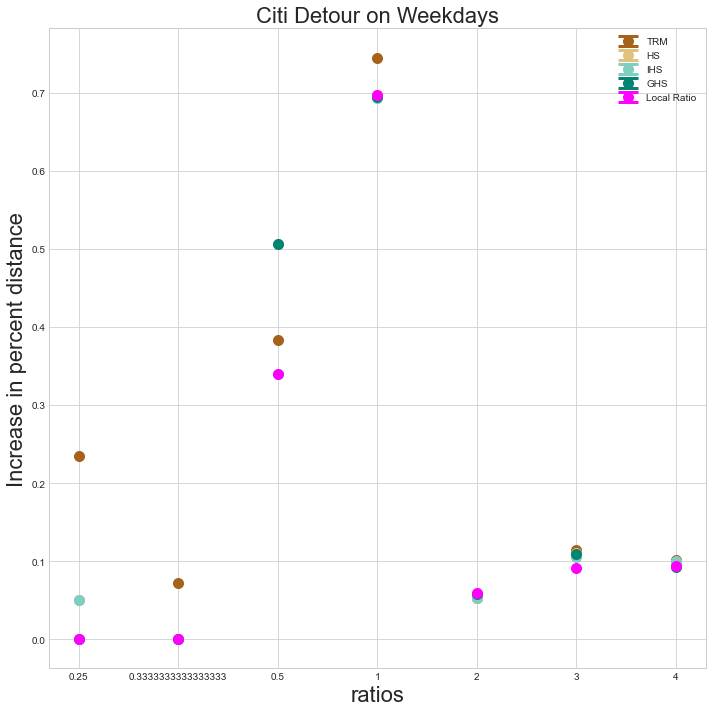

citi


<ipython-input-15-8a5ba372bd64>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ratios)


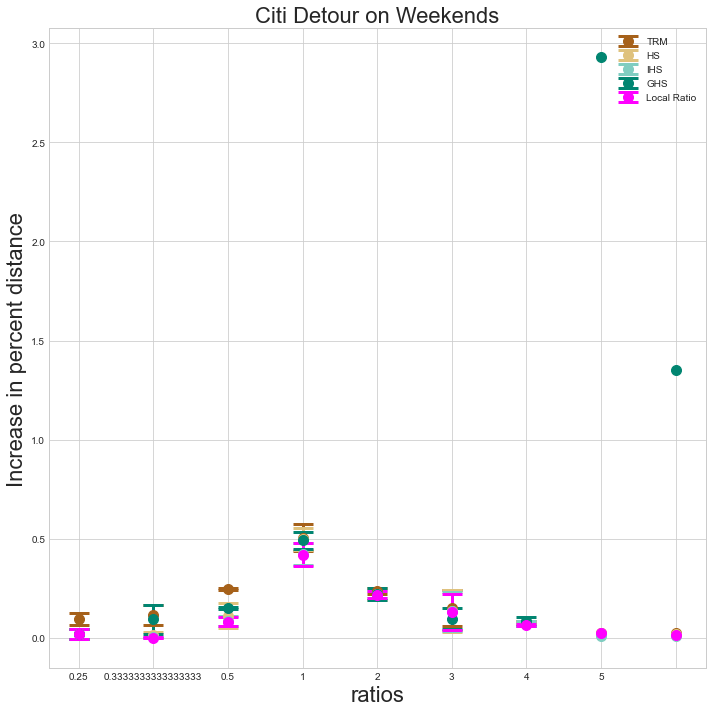

capit


/Users/trentjohnson/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
<ipython-input-15-8a5ba372bd64>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ratios)


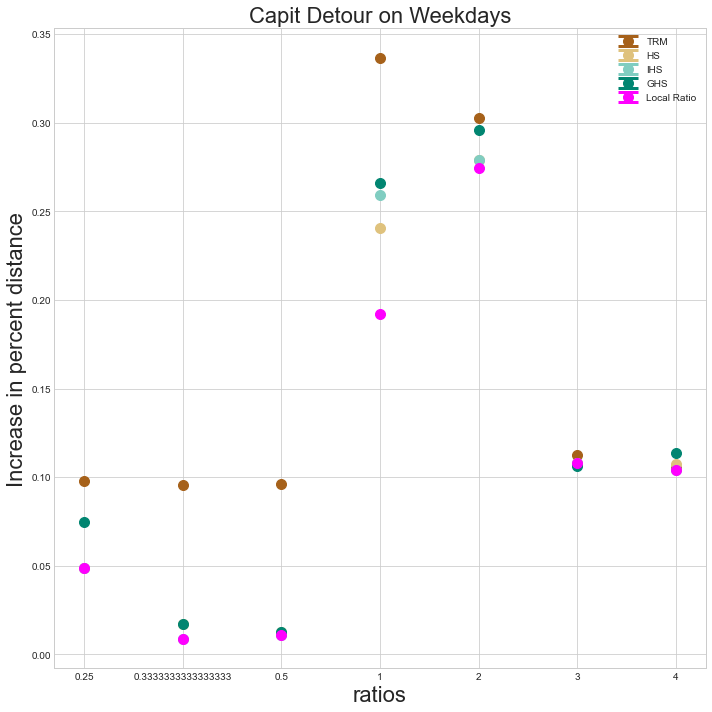

capit


/Users/trentjohnson/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
<ipython-input-15-8a5ba372bd64>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ratios)


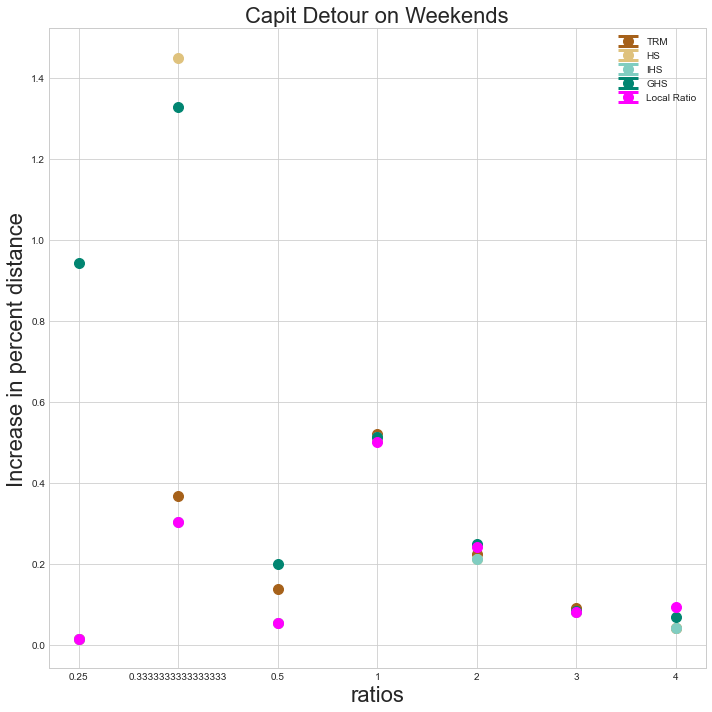

blue


/Users/trentjohnson/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
<ipython-input-15-8a5ba372bd64>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ratios)


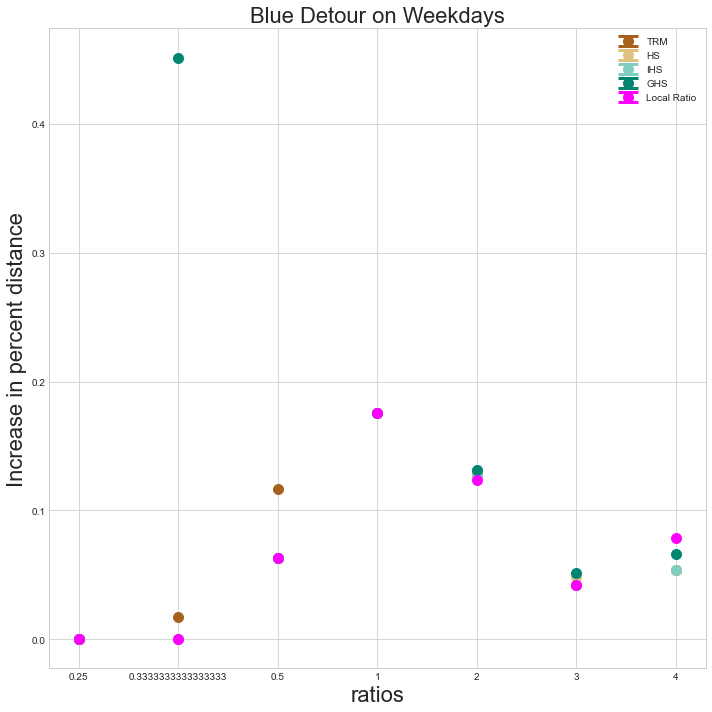

blue


/Users/trentjohnson/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
<ipython-input-15-8a5ba372bd64>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ratios)


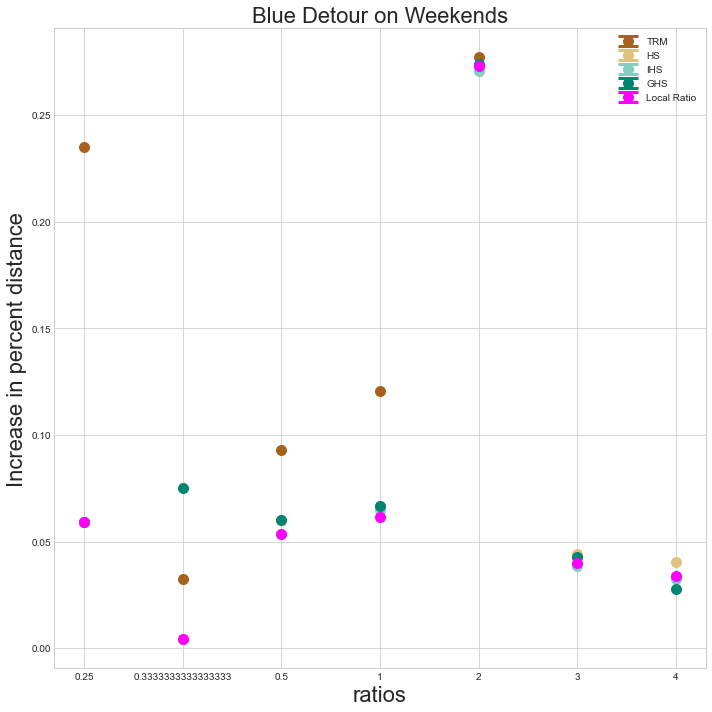

/Users/trentjohnson/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
<ipython-input-15-8a5ba372bd64>:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ratios)


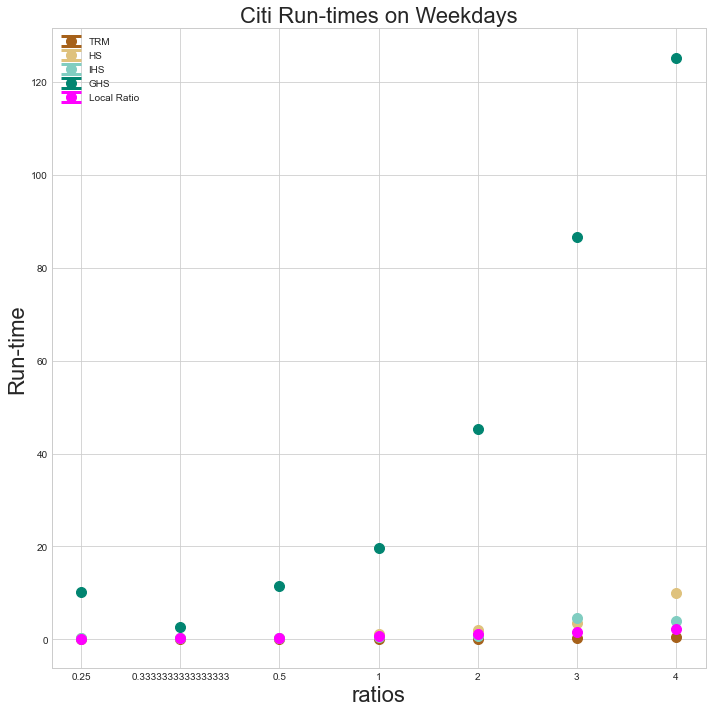

<ipython-input-15-8a5ba372bd64>:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ratios)


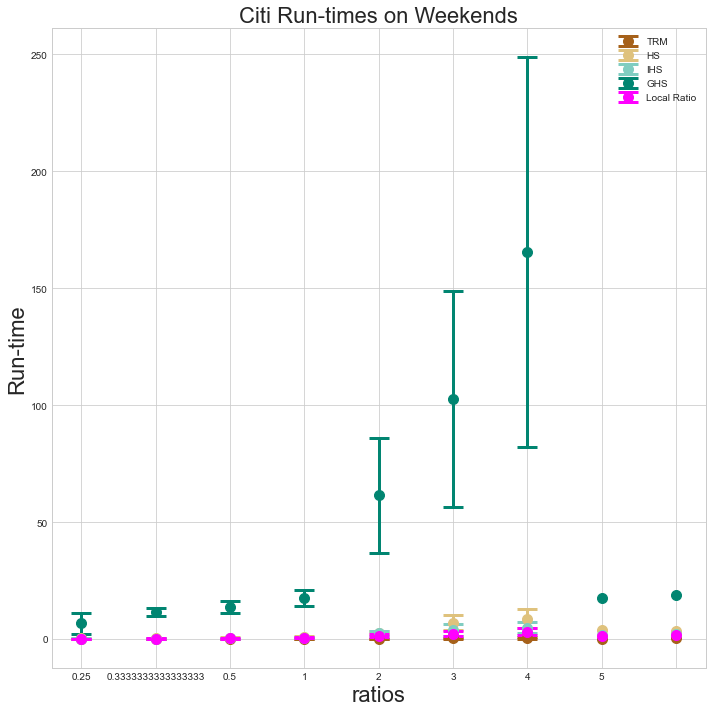

/Users/trentjohnson/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
<ipython-input-15-8a5ba372bd64>:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ratios)


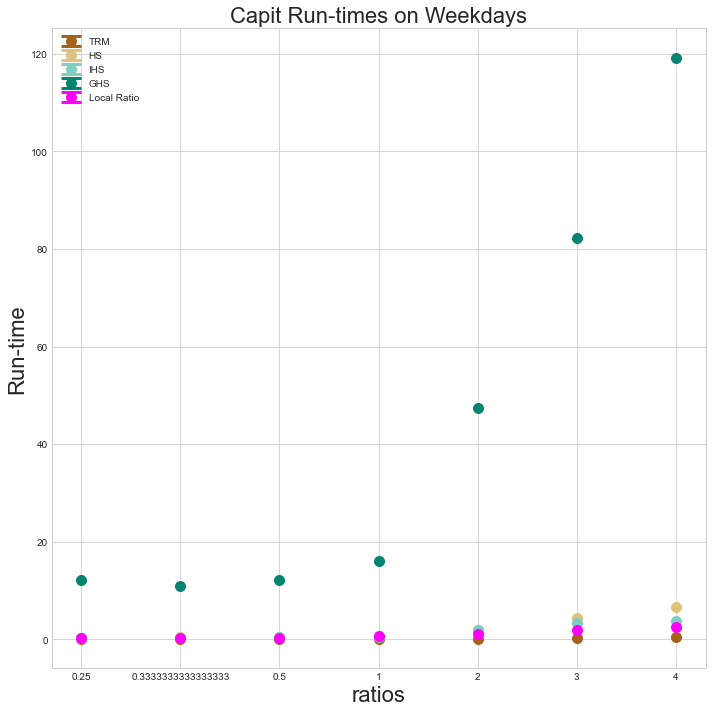

/Users/trentjohnson/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
<ipython-input-15-8a5ba372bd64>:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ratios)


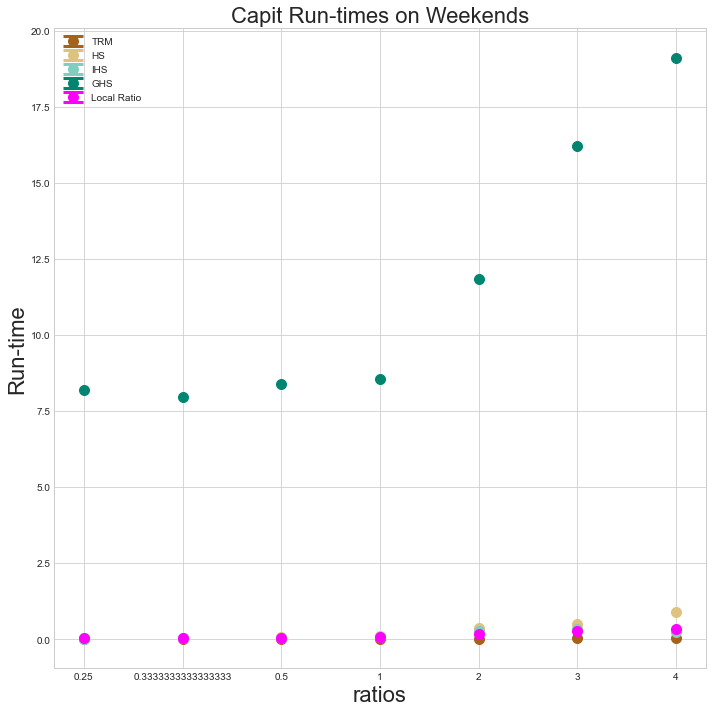

/Users/trentjohnson/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
<ipython-input-15-8a5ba372bd64>:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ratios)


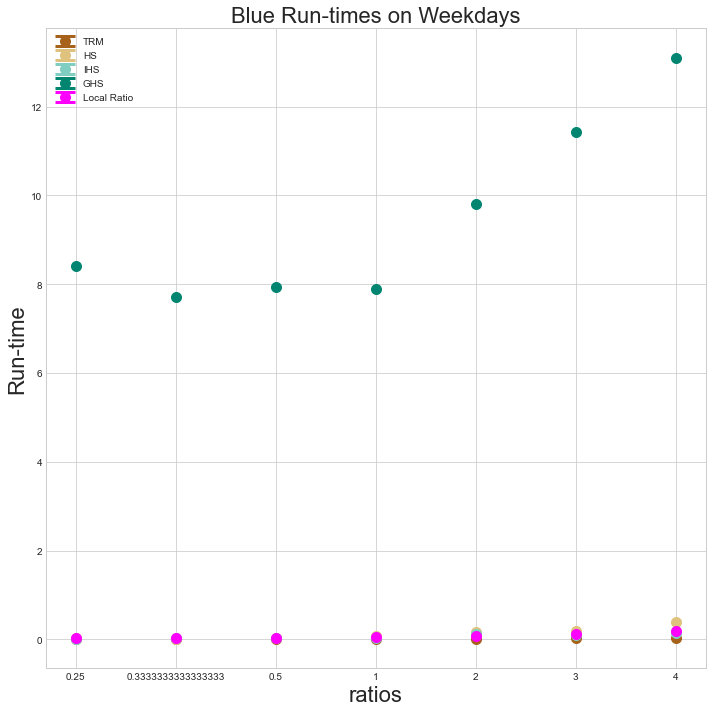

/Users/trentjohnson/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
<ipython-input-15-8a5ba372bd64>:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ratios)


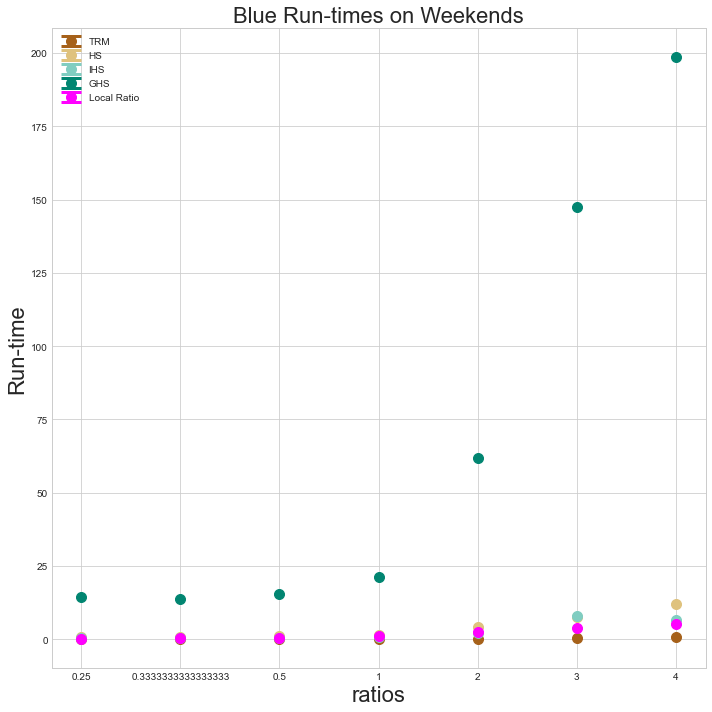

In [15]:
font = {'size'   : 22}
plt.style.use('seaborn-whitegrid')
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
colors = ['#a6611a', '#dfc27d', '#80cdc1', '#018571','#FF00FF']
color = 0
for source in sources:
    for day in ['weekday','weekend']:
        plt.style.use('seaborn-whitegrid')
        temp_df, det_cols = get_det_group(source,day)
        print(source)
        if source == 'capital':
            print(df.loc[(df.source==source),:])
        group = temp_df.groupby('ratios')
        fig, ax = plt.subplots()
    

        for c in det_cols: 
            ax.errorbar(group.groups.keys(), group[c].mean(), yerr=group[c].std(),label=c.split('_')[0],fmt='o',c=colors[color],ms=10,capsize=10,capthick=3,elinewidth=3)
            color +=1
        color = 0
        plt.title(source.capitalize() +' Detour on '+day.capitalize()+'s',**font)
        plt.legend()
        ax.set_ylabel('Increase in percent distance',**font)
        ax.set_xlabel('ratios',**font)
        ax.set_xticklabels(ratios)
        fig.set_size_inches(10, 10)
        
        fig.tight_layout()
        fig.savefig('figures/'+source+'_'+day+'scores_rats')
        plt.show()
        
for source in sources:
    for day in ['weekday','weekend']:
        plt.style.use('seaborn-whitegrid')
        fig, ax = plt.subplots()
        group = df.loc[(df.source == source) & (df.day==day)].groupby('ratios')
        for c in rt_cols: 
            ax.errorbar(group.groups.keys(), group[c].mean(), yerr=group[c].std(),label=c.split('_')[0],fmt='o',c=colors[color],ms=10,capsize=10,capthick=3,elinewidth=3)
            color +=1
        color = 0
        plt.title(source.capitalize()+' Run-times on '+day.capitalize()+'s',**font)
        ax.set_ylabel('Run-time',**font)
        ax.set_xlabel('ratios',**font)
        ax.set_xlabel('ratios',**font)
        ax.set_xticklabels(ratios)
        fig.set_size_inches(10, 10)
        
        fig.tight_layout()
        fig.savefig('figures/'+source+'_'+day+'scores_rats')
        plt.show()

In [16]:
day='weekday'
latex,det_cols = get_det_group(sources[0],day)
latex = latex.groupby('ratios').mean()
if len(sources)>1:
    for source in sources[1:]:
        latex.append(df.loc[(df.source == source) & (df.day==day),score_cols+['ratios']].groupby('ratios').mean().astype(int))

for source in sources:
    latex.append(df.loc[(df.source == source) & (df.day==day),score_cols+['ratios']].groupby('ratios').mean().astype(int))

In [17]:
print('k')

k


In [18]:
temp_agg = pd.DataFrame()

for source in sources:
    temp_=pd.DataFrame(columns=['TRMciti',  'Local Ratiociti', 'HSciti', 'GHSciti','IHSciti', 'TRMcapital' ,
                            'Local Ratiocapital' ,  'HScapital' ,  'GHScapital' ,  'IHScapital' ,  'TRMblue',
                            'Local Ratioblue' ,  'HSblue' ,  'GHSblue' ,  'IHSblue' ])
    for day in ['weekend','weekday']:
        temp = get_det_group(source,day)[0].groupby('ratios').mean()
        temp.index = [str(i)+' '+day.capitalize() for i in temp.index]
        temp.columns = [c.split('_')[0]+source for c in temp.columns]
        temp_=temp_.append(temp)
    for c in temp.columns:
        temp_agg[c]=np.round(temp_[c].values,2)

temp_agg.index = ([1,.8,.6,.4,.2]+[1,.8,.6,.4,.2])[::-1]
for i in range(len(temp_agg.index)):
    for j in [0,5,10]:
        temp_agg.iloc[i,j+np.argmin(temp_agg.iloc[i,range(j,j+5)].values)] = '\\textbf{'+str(temp_agg.iloc[i,j+np.argmin(temp_agg.iloc[i,range(j,j+5)].values)])+'}'

latex = temp_agg.to_latex()
latex = latex.replace('\\textbackslash textbf\\{','\\textbf{').replace('\\}','}')
print(latex)

ValueError: Length of values (14) does not match length of index (16)

In [ ]:

temp_agg = pd.DataFrame()

for source in sources:
    temp_=pd.DataFrame(columns=['TRMciti',  'Local Ratiociti', 'HSciti', 'GHSciti','IHSciti', 'TRMcapital' ,
                            'Local Ratiocapital' ,  'HScapital' ,  'GHScapital' ,  'IHScapital' ,  'TRMblue',
                            'Local Ratioblue' ,  'HSblue' ,  'GHSblue' ,  'IHSblue' ])
    for day in ['weekend','weekday']:
        temp = df.loc[(df.source == source) & (df.day==day),['ratios']+rt_cols].groupby('ratios').mean()
        temp.index = [str(i)+' '+day.capitalize() for i in temp.index]
        temp.columns = [c.split('_')[0]+source for c in temp.columns]
        temp_=temp_.append(temp)
    for c in temp.columns:
        temp_agg[c]=np.round(temp_[c].values,2)

temp_agg.index = [1,.8,.6,.4,.2]+[1,.8,.6,.4,.2]
print(temp_agg)
for i in range(len(temp_agg.index)):
    for j in [0,5,10]:
        print(temp_agg.iloc[i,range(j,j+5)].values)
        temp_agg.iloc[i,j+np.argmin(temp_agg.iloc[i,range(j,j+5)].values)] = '\\textbf{'+str(temp_agg.iloc[i,j+np.argmin(temp_agg.iloc[i,range(j,j+5)].values)])+'}'

latex = temp_agg.to_latex()
latex = latex.replace('\\textbackslash textbf\\{','\\textbf{').replace('\\}','}')
print(latex)